```
### Shane Kramer
### 207 Final Project Scratchpad
### 02.27.22 - Simple model based on request word count and comment count
```
---



In [50]:
import numpy as np 
import pandas as pd 
from pandas import json_normalize
import json 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Can configure the list below to filter columns from original training data set
test_cols = ['request_text', 'request_number_of_comments_at_retrieval', 'requester_received_pizza']

# Read JSON file
train_df = pd.read_json('/content/drive/MyDrive/W207/FinalProject/w207_final_project/src/data/train.json')
filtered_df = train_df[test_cols]

# Add word count column
filtered_df['request_text_count'] = filtered_df['request_text'].str.count(' ') + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [35]:
# Now need to split into features and targets
feature_cols = ['request_text_count', 'request_number_of_comments_at_retrieval']
X = filtered_df[feature_cols]
Y = filtered_df.requester_received_pizza


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

In [53]:
# Create and train model using train data
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X)

In [52]:
# Run model against test data
Y_test_pred = logreg.predict(X_test)

In [54]:
# Look at confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)
cnf_matrix

array([[732,  33],
       [220,  25]])

Text(0.5, 257.44, 'Predicted label')

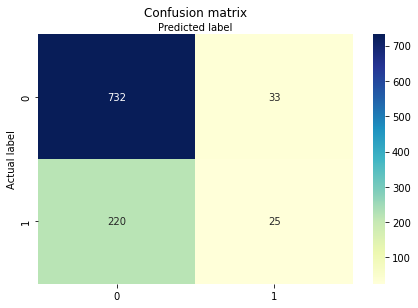

In [55]:
# Plot results
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
# Output results
print("Accuracy:",metrics.accuracy_score(Y, Y_pred))
print("Precision:",metrics.precision_score(Y, Y_pred))
print("Recall:",metrics.recall_score(Y, Y_pred))

Accuracy: 0.7589108910891089
Precision: 0.5416666666666666
Recall: 0.13078470824949698
